# Data Frame Description

Problem Statement:
    
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
    
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket(Target)

# Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the dataset

In [2]:
train=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Test_set.xlsx')
pd.set_option('display.max_columns',None)
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#checking shape of training and testing dataset
train.shape

(10683, 11)

In [4]:
test.shape

(2671, 10)

Observation:
    
Total Rows(In training dataset):10683,Total Columns(In training dataset):11
        
Total Rows(In test dataset):2671,Total Columns(In test dataset):10

In [5]:
#checking the columns present
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [7]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

Observation:
    
Except Price all other columns are categorical datatype.

In [8]:
train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
30h 25m      1
33h 45m      1
27h 55m      1
31h 30m      1
36h 25m      1
Name: Duration, Length: 368, dtype: int64

# Checking null values in the dataframe

In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

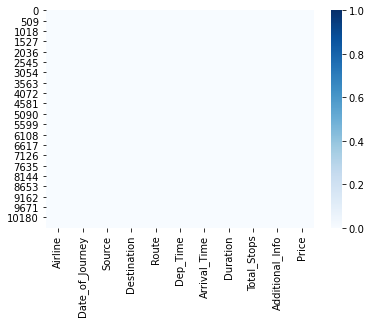

In [11]:
#data visualisation
sns.heatmap(train.isnull(),cmap='Blues')

In [12]:
#%age data missing
for i in train.columns:
    print('% data missing in',i,'is:',(train[i].isnull().sum()/train.shape[0])*100)

% data missing in Airline is: 0.0
% data missing in Date_of_Journey is: 0.0
% data missing in Source is: 0.0
% data missing in Destination is: 0.0
% data missing in Route is: 0.009360666479453337
% data missing in Dep_Time is: 0.0
% data missing in Arrival_Time is: 0.0
% data missing in Duration is: 0.0
% data missing in Total_Stops is: 0.009360666479453337
% data missing in Additional_Info is: 0.0
% data missing in Price is: 0.0


In [13]:
#dropping the null values in train dataset as the percentage is very low and wont impact the prediction.
train.dropna(inplace=True)

# Exploratory Data Analysis:

In [14]:
#Date_of_Journey is object datatype,therefore converting it to timestamp.
train['Date_of_Journey']=pd.to_datetime(train['Date_of_Journey'])
test['Date_of_Journey']=pd.to_datetime(test['Date_of_Journey'])

In [15]:
#Extracting Journey day and journey month
train['Journey_Day']=pd.to_datetime(train['Date_of_Journey'],format="%d/%m/%Y").dt.day
train['Journey_Month']=pd.to_datetime(train['Date_of_Journey'],format="%d/%m/%Y").dt.month
test['Journey_Day']=pd.to_datetime(test['Date_of_Journey'],format="%d/%m/%Y").dt.day
test['Journey_Month']=pd.to_datetime(test['Date_of_Journey'],format="%d/%m/%Y").dt.month

In [16]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [17]:
#extracting month name,day name and quarter
train['Journey Month Name']=train['Date_of_Journey'].dt.month_name()
train['Journey Day Name']=train['Date_of_Journey'].dt.day_name()
train['Quarter']=train['Date_of_Journey'].dt.quarter
test['Journey Month Name']=test['Date_of_Journey'].dt.month_name()
test['Journey Day Name']=test['Date_of_Journey'].dt.day_name()
test['Quarter']=test['Date_of_Journey'].dt.quarter
train.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey Month Name,Journey Day Name,Quarter
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,March,Sunday,1


In [18]:
#dropping column Date_of_Journey as we have extracted the information from it
train.drop(['Date_of_Journey'],axis=1,inplace=True)
test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [19]:
#Similarly Dep_Time is object datatype,therefore converting it to timestamp.
train['Dep_Time']=pd.to_datetime(train['Dep_Time'])
test['Dep_Time']=pd.to_datetime(test['Dep_Time'])

In [20]:
#extracting departure hour and minute.
train['Dep_Hour']=train['Dep_Time'].dt.hour
train['Dep_Min']=train['Dep_Time'].dt.minute
test['Dep_Hour']=test['Dep_Time'].dt.hour
test['Dep_Min']=test['Dep_Time'].dt.minute
train.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey Month Name,Journey Day Name,Quarter,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-04-22 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,March,Sunday,1,22,20


In [21]:
#dropping column Dep_Time as we have extracted the information from it
train.drop(['Dep_Time'],axis=1,inplace=True)
test.drop(['Dep_Time'],axis=1,inplace=True)

In [22]:
#Similarly Arrival_Time is object datatype,therefore converting it to timestamp.
train['Arrival_Time']=pd.to_datetime(train['Arrival_Time'])
test['Arrival_Time']=pd.to_datetime(test['Arrival_Time'])

In [23]:
#extracting arrival date,day,hour and minute.
train['Arrival_Hour']=train['Arrival_Time'].dt.hour
train['Arrival_Min']=train['Arrival_Time'].dt.minute
test['Arrival_Hour']=test['Arrival_Time'].dt.hour
test['Arrival_Min']=test['Arrival_Time'].dt.minute
train.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey Month Name,Journey Day Name,Quarter,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,March,Sunday,1,22,20,1,10


In [24]:
#dropping column Arrival_Time as we have extracted the information from it
train.drop(['Arrival_Time'],axis=1,inplace=True)
test.drop(['Arrival_Time'],axis=1,inplace=True)

In [25]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey Month Name,Journey Day Name,Quarter,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,March,Sunday,1,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,January,Saturday,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,September,Friday,3,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,December,Thursday,4,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,January,Thursday,1,16,50,21,35


In [26]:
#converting duration column to minutes
train['Duration_Minutes'] = (train['Duration'].replace(['h', 'm'], ['*60+', ''], regex=True)
                           .str.strip('+')
                           .apply(pd.eval))
test['Duration_Minutes'] = (test['Duration'].replace(['h', 'm'], ['*60+', ''], regex=True)
                           .str.strip('+')
                           .apply(pd.eval))

In [27]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey Month Name,Journey Day Name,Quarter,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,March,Sunday,1,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,January,Saturday,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,September,Friday,3,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,December,Thursday,4,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,January,Thursday,1,16,50,21,35,285


In [28]:
#Dropping unnecessary columns
#Route and total stops are related to each other so we drop Route
train.drop(['Route','Duration','Additional_Info'],axis=1,inplace=True)
test.drop(['Route','Duration','Additional_Info'],axis=1,inplace=True)

# Univariate Analysis(Numerical Data):

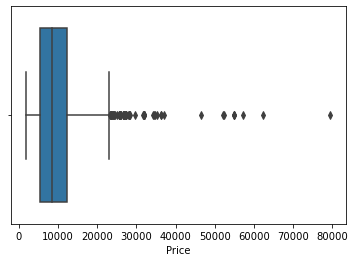

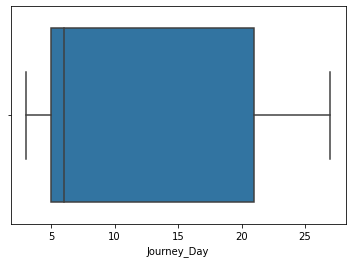

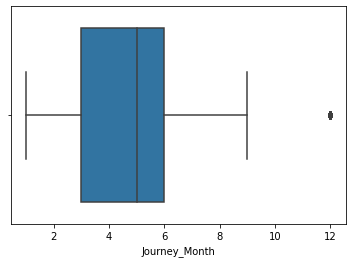

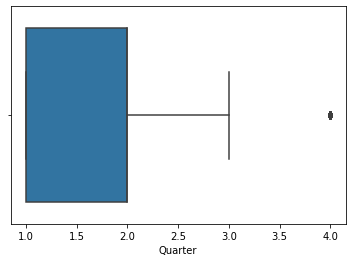

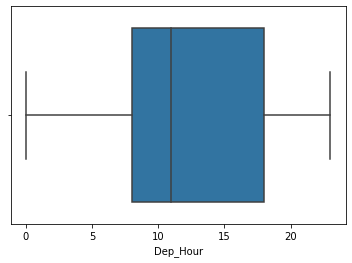

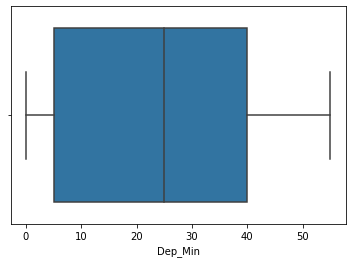

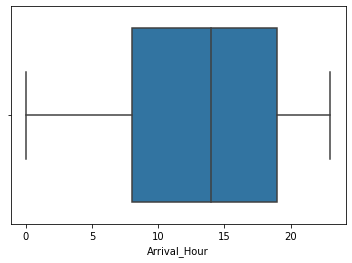

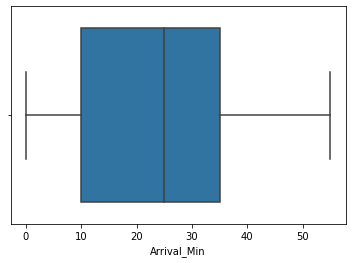

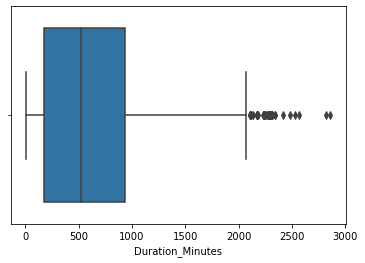

In [29]:
# Univariate Analysis(Numerical Data):
for i in train.columns:
    if (train[i].dtypes=='float')|(train[i].dtypes=='int64'):
        sns.boxplot(train[i])
        plt.show()

Observation(For continuous numeical data):
    
1.The maximum ticket price is around 80000 and the average price is around 9000.

2.The maximum duration time is around 2800 min and the average duration time is around 500.

# Univariate Analysis(Categorical Data):

In [30]:
for i in train.columns:
    if (train[i].dtypes=='object'):
        print(f'================================{i}===================================')
        print(train[i].value_counts())
        print('\n')

================================Airline===================================
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


================================Source===================================
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


================================Destination===================================
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destinatio

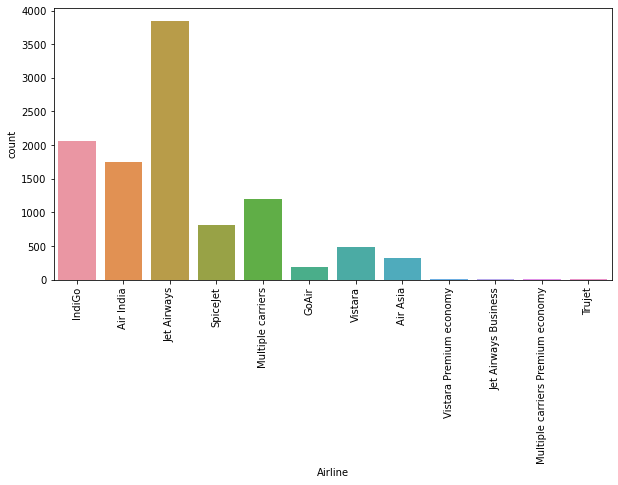

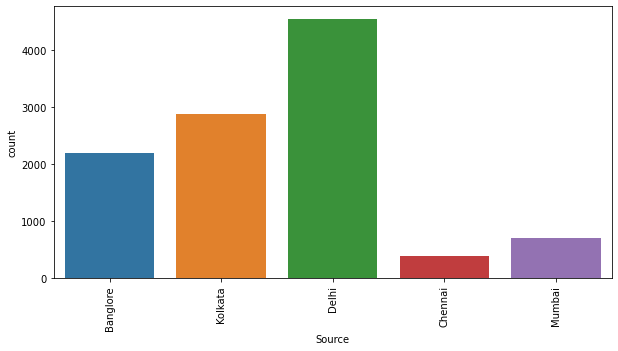

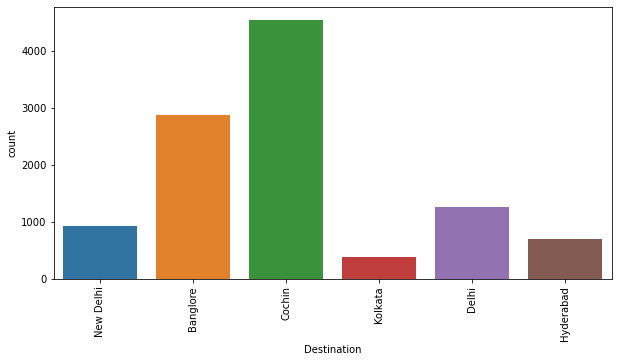

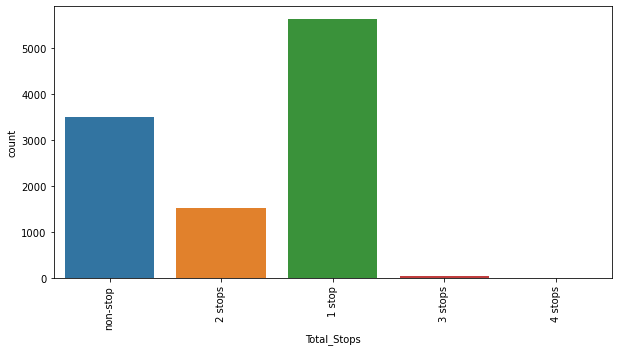

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

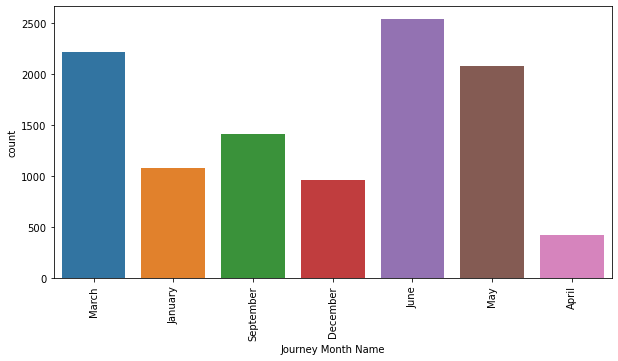

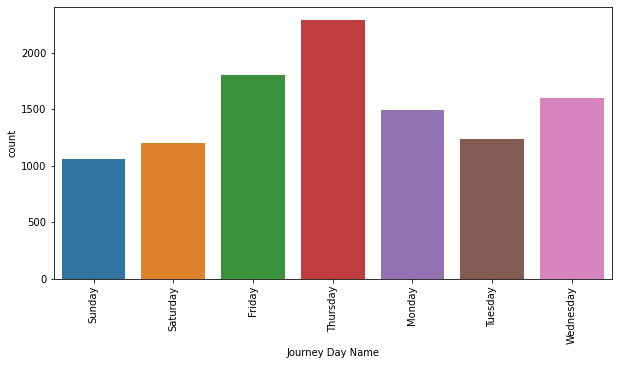

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [31]:
for i in train.columns:
    plt.figure(figsize=(10,5))
    if (train[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.countplot(x=i,data=train)
        plt.show()

Observation:
    
1.Majority of passenger prefers Jet Airways for travelling.

2.Majority of passenger travels from Delhi.

3.Majority of passenger travels to Cochin followed by Bangalore.

4.Majority of passenger travels with flight have total stoppage as one followed by nonstop and very few travels with 3stops and 4stops.

5.Majority of people prefers to travel in the month of June,March and May.

# Bivariate Ananlysis:

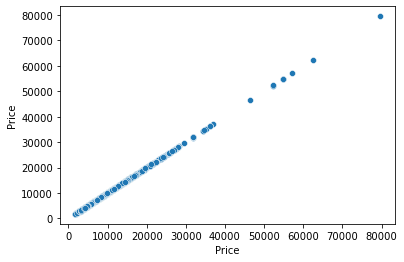

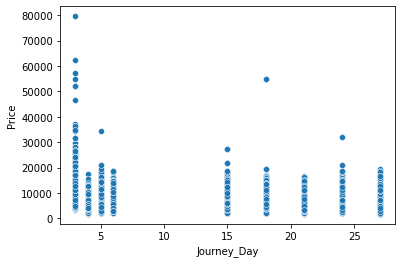

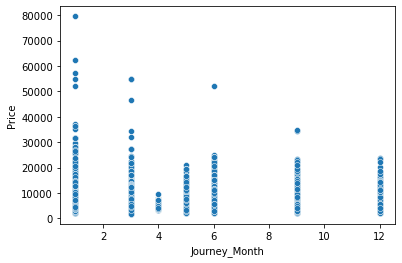

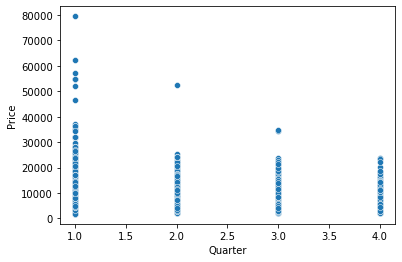

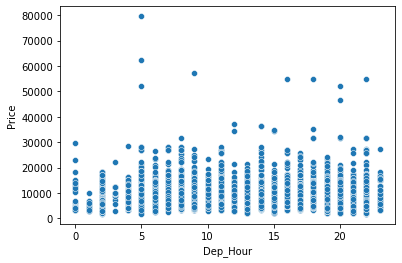

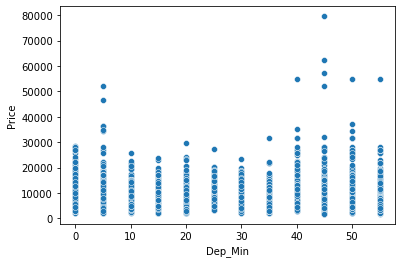

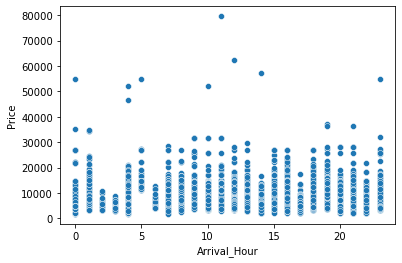

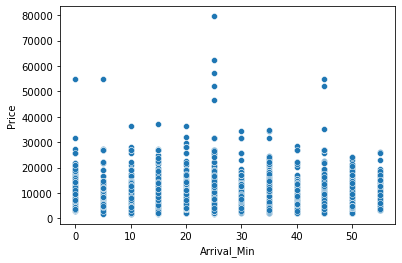

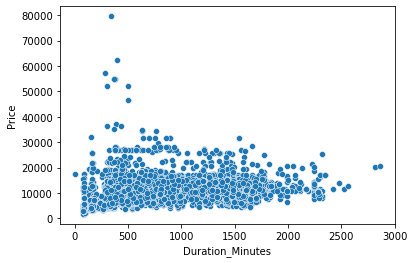

In [32]:
for i in train.columns:
    if (train[i].dtypes=='float')|(train[i].dtypes=='int64'):
        sns.scatterplot(x=i,y='Price',data=train)
        plt.show()    

Observation:
    
1.The price of ticket is minimum in the month of april and maximum in the month of january.

2.In the first quarter of the year the price of ticket is highest and least in the 4th quarter.

3.The price of ticket is high for 5th hour and 15-24th hour.

4.With increase in duration minutes the flight price increases.

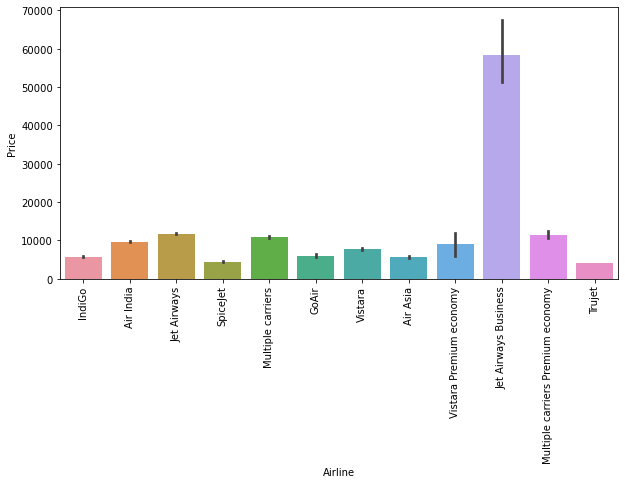

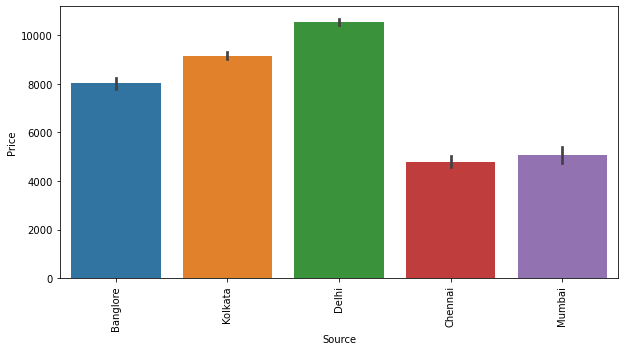

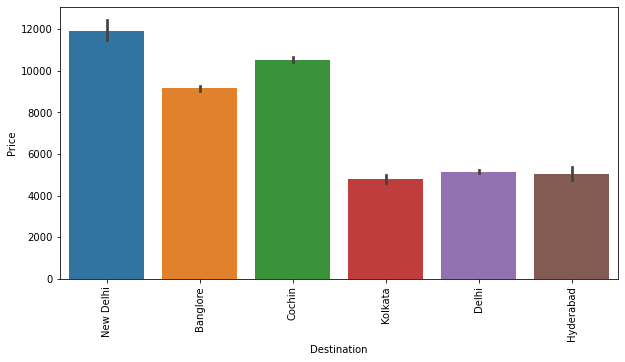

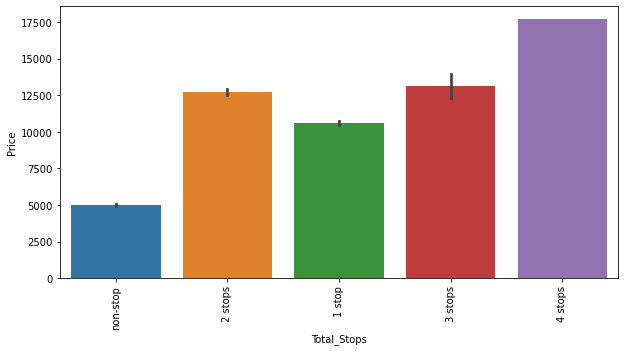

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

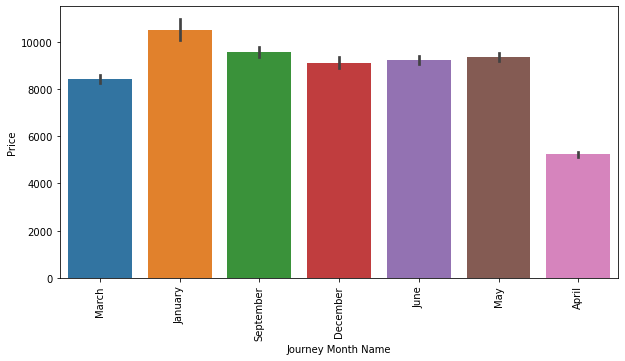

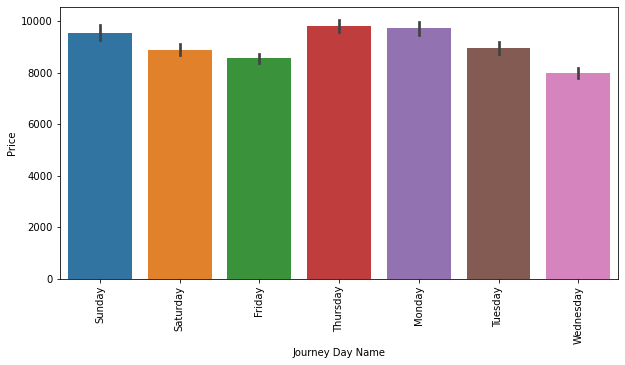

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [33]:
for i in train.columns:
    plt.figure(figsize=(10,5))
    if (train[i].dtypes=='object'):
        plt.xticks(rotation=90)
        sns.barplot(x=i,y='Price',data=train)
        plt.show()

Key Observation:
    
1.In the month of January the ticket price is maximun and is least for the month of April.

2.Jet Airways Business has the maximum ticket price.

3.People travelling from(Source) Delhi and Kolkata have to pay higher ticket fare.

4.People travelling to(Destination)New Delhi and Cochin have to pay higher ticket fare.

5.3stop and 4stop have high fare while nonstop have the least.

# Data Set Description

In [34]:
train.describe()

,Price,Journey_Day,Journey_Month,Quarter,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9087.214567,12.682925,5.534731,2.003183,12.491013,24.409287,13.349186,24.690601,643.020502
std,4611.548810,8.803800,2.987626,0.893123,5.748820,18.767801,6.859317,16.506808,507.830133
min,1759.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,5277.000000,5.000000,3.000000,1.000000,8.000000,5.000000,8.000000,10.000000,170.000000
50%,8372.000000,6.000000,5.000000,2.000000,11.000000,25.000000,14.000000,25.000000,520.000000
75%,12373.000000,21.000000,6.000000,2.000000,18.000000,40.000000,19.000000,35.000000,930.000000
max,79512.000000,27.000000,12.000000,4.000000,23.000000,55.000000,23.000000,55.000000,2860.000000


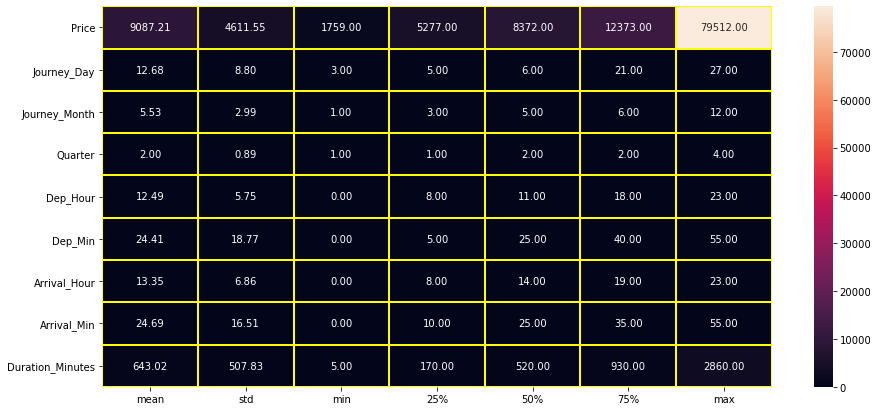

In [35]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(train.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

Key Observation:
    
1.Huge diffrence in the 3rd quartile and max in price indicates possibility of outliers.

2.For the column Journey_Day and Duration_Minutes the mean is greater than median indicating right skewness.

3.Except Journey_Day and Duration_Minutes all other columns have mean and median almost equal indicating normally distributed.

# Correlation of columns with target columns

In [36]:
train.corr()['Price'].sort_values()

Journey_Day        -0.165448
Arrival_Min        -0.086155
Dep_Min            -0.024458
Dep_Hour            0.006799
Journey_Month       0.010705
Quarter             0.014358
Arrival_Hour        0.024244
Duration_Minutes    0.506480
Price               1.000000
Name: Price, dtype: float64

<AxesSubplot:>

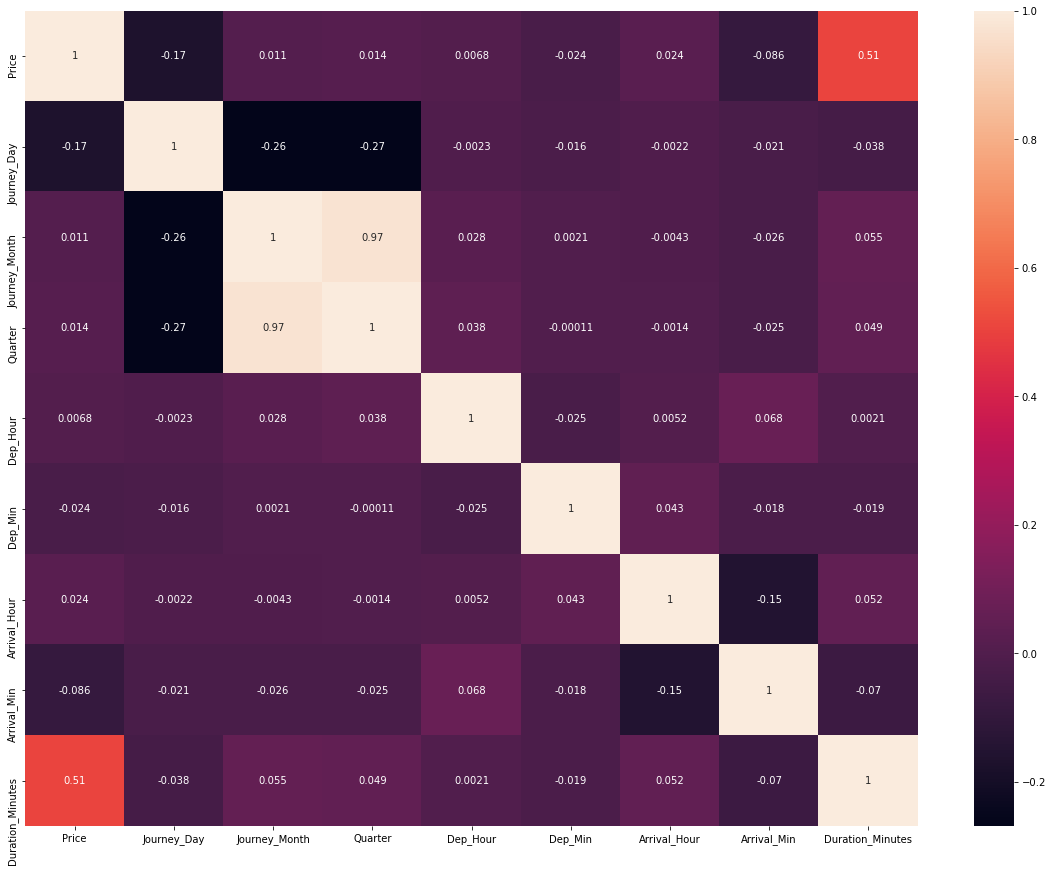

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),annot=True)

Observation:
    
Duration_Minutes is highly positively correlated with the target i.e with increase in duration the price increases.


In [38]:
#dropping column Quarter as it highly correlated with feature Journey_Month and weak correlation with target(price)
#dropping columns Journey Month Name as we already have numerical form 
train.drop(['Quarter','Journey Month Name'],axis=1,inplace=True)
test.drop(['Quarter','Journey Month Name'],axis=1,inplace=True)

# Checking Skewness

In [39]:
train.skew()

Price               1.812405
Journey_Day         0.367212
Journey_Month       0.629556
Dep_Hour            0.112924
Dep_Min             0.167234
Arrival_Hour       -0.370146
Arrival_Min         0.110945
Duration_Minutes    0.861411
dtype: float64

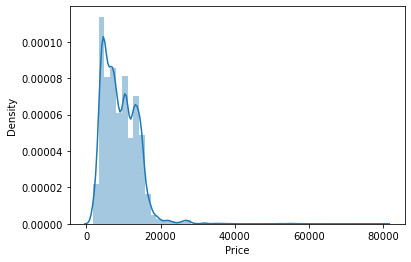

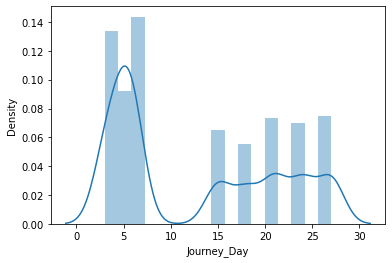

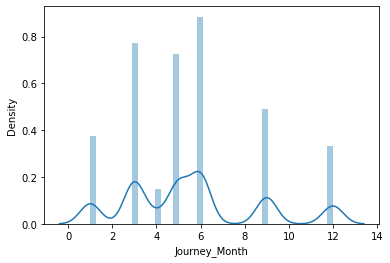

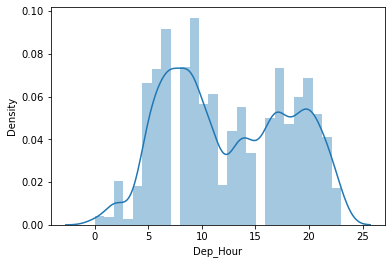

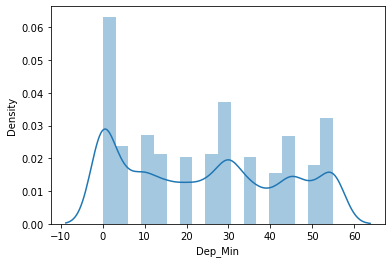

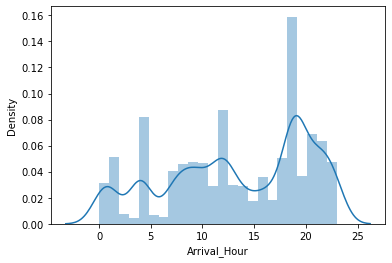

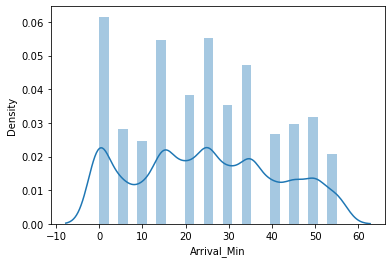

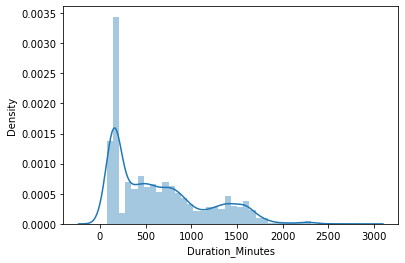

In [40]:
for i in train.columns:
      if (train[i].dtypes=='float')|(train[i].dtypes=='int64'):
        sns.distplot(train[i])
        plt.show()

Observation: Taking +/- 0.5 as the range of skewness the columns(continuos numerical data) having high skewness are:
        
Price,Duraion_Minutes

# Outliers Checking:

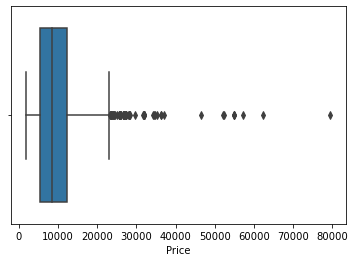

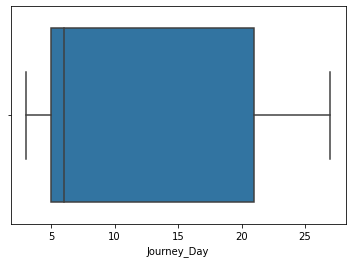

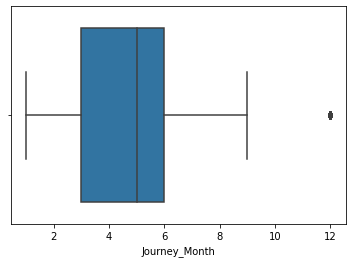

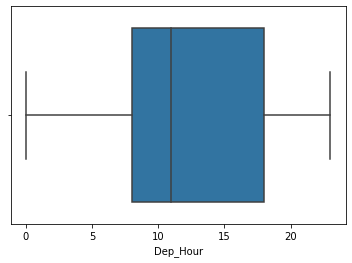

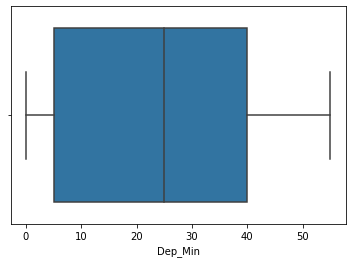

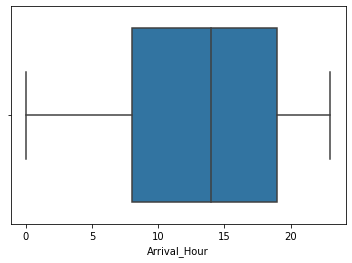

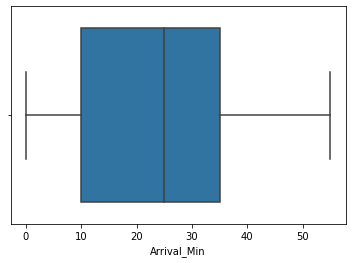

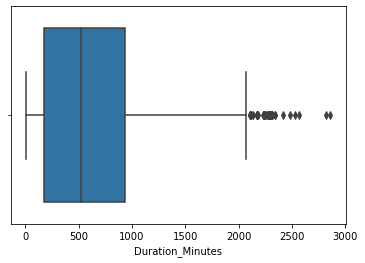

In [41]:
for i in train.columns:
      if (train[i].dtypes=='float')|(train[i].dtypes=='int64'):
        sns.boxplot(train[i])
        plt.show()

Observation: Price(Target) and Duration_Minutes have high outliers present.

# DATA PREPROCESSING

# Converting String data to Numerical Data

In [42]:
train.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [43]:
train.replace({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6},inplace=True)
test.replace({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6},inplace=True)

In [44]:
train

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey Day Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,0,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,6,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,5,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,5,12,4,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,3,1,4,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,4,9,3,19,55,22,25,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,6,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,6,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,0,12648,3,1,4,11,30,14,10,160


In [45]:
#treating nominal data-Airline,Source,Destination in training dataset
airline=pd.get_dummies(train.Airline,drop_first=True)
source=pd.get_dummies(train.Source, drop_first=True)
dest=pd.get_dummies(train.Destination, drop_first=True)

In [46]:
# Concatenate dataset with Airline, Source, Destination

train = pd.concat([train,airline,source,dest], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
train.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

train

,Total_Stops,Price,Journey_Day,Journey_Month,Journey Day Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,0,22,20,1,10,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,1,6,5,50,13,15,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,6,9,5,9,25,4,25,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,5,12,4,18,5,23,30,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,3,1,4,16,50,21,35,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,4,9,3,19,55,22,25,150,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,6,20,45,23,20,155,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,6,8,20,11,20,180,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,3,1,4,11,30,14,10,160,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [47]:
#treating nominal data-Airline,Source,Destination in testing dataset
airline=pd.get_dummies(test.Airline,drop_first=True)
source=pd.get_dummies(test.Source, drop_first=True)
dest=pd.get_dummies(test.Destination, drop_first=True)

In [48]:
# Concatenate dataset with Airline, Source, Destination

test = pd.concat([test,airline,source,dest], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)



# REMOVING OUTLIERS:

In [49]:
#using quantile method
num=['Duration_Minutes']
for i in num:
    ub=train[i].quantile(0.99)
    lb=train[i].quantile(0.01)
    print(i)
    print('upper bound:',ub)
    print('lower bound:',lb)
    print('\n')

Duration_Minutes
upper bound: 1900.0
lower bound: 85.0




In [50]:
train_new=train[(train['Duration_Minutes']<=1900.0)&(train['Duration_Minutes']>=85.0)]

In [51]:
train.shape[0]

10682

In [52]:
train_new.shape[0]

10490

In [53]:
data_loss=((train.shape[0]-train_new.shape[0])/train.shape[0])*100
data_loss

1.7974162141920986

Since only 1.8% data is lost due to ouliers removal we can consider to remove outliers

In [54]:
train=train_new

In [55]:
test.sample()

,Total_Stops,Journey_Day,Journey_Month,Journey Day Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
1336,1,5,12,4,18,55,23,35,1720,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [56]:
train.sample()

,Total_Stops,Price,Journey_Day,Journey_Month,Journey Day Name,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
2407,1,8610,6,12,5,7,10,20,20,790,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [57]:
train.drop(labels=['Trujet'], axis=1, inplace=True)

# Skewness Treatment:

In [58]:
x=train.drop(['Price'],axis=1)
y=train['Price']

In [59]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

test=power_transform(test,method='yeo-johnson')

In [60]:
#feature scaling
from sklearn.preprocessing import  MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
test=sc.fit_transform(test)
x

array([[0.        , 0.94432352, 0.28394579, ..., 0.        , 0.        ,
        1.        ],
       [0.60028631, 0.2162562 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60028631, 0.29735892, 0.80911205, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.39411571, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.60028631, 0.2162562 , 0.80911205, ..., 0.        , 0.        ,
        0.        ]])

# Model Building:

In [61]:
# Since our target is continuous numerical variable we will use regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if round(r2_score(y_train,train_pred),1)==round(r2_score(y_test,test_pred),1):
        print('training score :',r2_score(y_train,train_pred))
        print('testing score :',r2_score(y_test,test_pred))
        print('At random_state=',i,"the model performs well",'\n')

training score : 0.6297472515421132
testing score : 0.6206791871450354
At random_state= 0 the model performs well 

training score : 0.6141643312106259
testing score : 0.6174740965073466
At random_state= 3 the model performs well 

training score : 0.6211574930478119
testing score : 0.6412081281548212
At random_state= 4 the model performs well 

training score : 0.630466732431246
testing score : 0.6193388138118142
At random_state= 5 the model performs well 

training score : 0.6397631682997988
testing score : 0.5902911721594288
At random_state= 6 the model performs well 

training score : 0.6130550129900962
testing score : 0.6348928864879453
At random_state= 7 the model performs well 

training score : 0.622980874614014
testing score : 0.6372506782538359
At random_state= 8 the model performs well 

training score : 0.6419415263667012
testing score : 0.5928430633594413
At random_state= 9 the model performs well 

training score : 0.6367996693016573
testing score : 0.6023927971590815
At 

In [62]:
#selecting random_state =26
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=26)
lr.fit(x_train,y_train)
test_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
print('testing score :',r2_score(y_test,test_pred))
print('training score :',r2_score(y_train,train_pred))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,test_pred))
print('Mean squared error:',mean_squared_error(y_test,test_pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,test_pred)))

testing score : 0.6266789905089567
training score : 0.6267070180948351
Error:
Mean absolue error: 1993.6358436606292
Mean squared error: 7829608.795678424
Root Mean squared error: 2798.1438125440272


In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [95]:
model=[DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor(),AdaBoostRegressor(),XGBRegressor()]
for i in model:
    i.fit(x_train,y_train)
    i_pred=i.predict(x_test)
    train_pred=i.predict(x_train)
    print(i)
    print('testing score :',r2_score(y_test,i_pred))
    print('training score :',r2_score(y_train,train_pred))

    print('Error:')
    print('Mean absolue error:',mean_absolute_error(y_test,i_pred))
    print('Mean squared error:',mean_squared_error(y_test,i_pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,i_pred)))
    print()
    print()


DecisionTreeRegressor()
testing score : 0.7327130747632232
training score : 0.9733758126509766
Error:
Mean absolue error: 1349.5935229318927
Mean squared error: 5444840.866716185
Root Mean squared error: 2333.4182794167414


KNeighborsRegressor()
testing score : 0.7499766448812207
training score : 0.8137196372766138
Error:
Mean absolue error: 1464.353987925008
Mean squared error: 5093168.6253574835
Root Mean squared error: 2256.804959529619


LinearRegression()
testing score : 0.6323351788915273
training score : 0.6247027850359028
Error:
Mean absolue error: 1977.9339053066412
Mean squared error: 7489616.042580235
Root Mean squared error: 2736.716288287888


GradientBoostingRegressor()
testing score : 0.7888473908821121
training score : 0.7910585321514456
Error:
Mean absolue error: 1493.792682686916
Mean squared error: 4301341.542315871
Root Mean squared error: 2073.967584683008


RandomForestRegressor()
testing score : 0.8109569997535074
training score : 0.9530789553044665
Error:
Mean 

# TUNING THE MODEL USING GRID SEARCH CV

In [65]:
from sklearn.model_selection import GridSearchCV

In [100]:
#tuning random forest model
from sklearn.ensemble import RandomForestRegressor
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[5,10],'n_estimators':[100,200,300,350]}
rf=RandomForestRegressor()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}


In [101]:
rf=RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=10)    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=68)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,rfpred))
print('training score :',rf.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,rfpred))
print('Mean squared error:',mean_squared_error(y_test,rfpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,rfpred)))

The CV score is: 0.8144819437806806
testing score : 0.8206021617275356
training score : 0.8916028569640052
Error:
Mean absolue error: 1267.3319022434857
Mean squared error: 3654472.362840646
Root Mean squared error: 1911.667429978511


In [69]:
#kneighbors 
parameters={'n_neighbors':[2,3,5,10,15,20,25,30,35],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knr=KNeighborsRegressor()
knrg=GridSearchCV(knr,parameters)
knrg.fit(x_train,y_train)
print(knrg.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


In [70]:
knr=KNeighborsRegressor(n_neighbors=3,algorithm='auto',weights='uniform')
knr.fit(x_train,y_train)
knrpred=knr.predict(x_test)
knr.score(x_train,y_train)
cv_score=cross_val_score(knr,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,knrpred))
print('training score :',knr.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,knrpred))
print('Mean squared error:',mean_squared_error(y_test,knrpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,knrpred)))

The CV score is: 0.7299783337673811
testing score : 0.7378536571334506
training score : 0.8654672967564192
Error:
Mean absolue error: 1479.1042262472197
Mean squared error: 5340123.23811037
Root Mean squared error: 2310.870666677469


In [71]:
#tuning gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['squared_error','absolute_error','huber','quantile'],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
gb=GradientBoostingRegressor()
gbrg=GridSearchCV(gb,parameters)
gbrg.fit(x_train,y_train)
print(gbrg.best_params_)

{'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 350}


In [72]:
gb=GradientBoostingRegressor(n_estimators=350,loss='squared_error',learning_rate=0.1)
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
cv_score=cross_val_score(gb,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,gbpred))
print('training score :',gb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,gbpred))
print('Mean squared error:',mean_squared_error(y_test,gbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,gbpred)))

The CV score is: 0.8054593486806564
testing score : 0.8261365929702909
training score : 0.8470470529987275
Error:
Mean absolue error: 1348.18651028545
Mean squared error: 3541731.7288650423
Root Mean squared error: 1881.9489177087253


In [98]:
#tuning xgboost model
parameters={'booster':['gbtree','gblinear'],'max_depth':[5,10],'learning_rate':[0.1,0.001,1,10],'n_estimators':[100,200,300,350]}
xgb=XGBRegressor()
xgbg=GridSearchCV(xgb,parameters)
xgbg.fit(x_train,y_train)
print(xgbg.best_params_)

[13:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:15:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depth" } might not be used.

  This could b

In [99]:
xgb=XGBRegressor(n_estimators=300,learning_rate=0.1,booster='gbtree',max_depth=5)
xgb.fit(x_train,y_train)
xgbpred=xgb.predict(x_test)
xgb.score(x_train,y_train)
cv_score=cross_val_score(xgb,x,y,cv=5)
cv_mean=cv_score.mean()
print('The CV score is:',cv_mean)
print('testing score :',r2_score(y_test,xgbpred))
print('training score :',xgb.score(x_train,y_train))
print('Error:')
print('Mean absolue error:',mean_absolute_error(y_test,xgbpred))
print('Mean squared error:',mean_squared_error(y_test,xgbpred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,xgbpred)))

The CV score is: 0.8325516897094148
testing score : 0.8446313919115563
training score : 0.9158864877496607
Error:
Mean absolue error: 1208.2674041156508
Mean squared error: 3164978.4065396218
Root Mean squared error: 1779.0386186195121


# Conclusion:

Selecting XGboost as our final model as it is performing better than other models.

<AxesSubplot:xlabel='Price'>

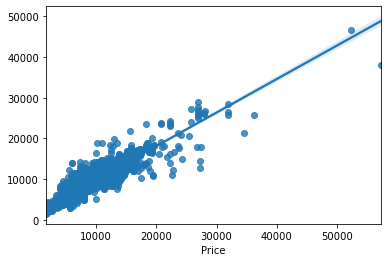

In [102]:
sns.regplot(y_test,xgbpred,data=train)

In [112]:
roriginal=np.array(y_test)
rpredicted=np.array(xgbpred)
df_comp=pd.DataFrame({'Original':roriginal,'Predicted':rpredicted},index=range(len(roriginal)))
df_comp.sample(5)

,Original,Predicted
1971,11087,10911.897461
484,7317,6853.919922
2795,18286,18408.716797
683,8016,6709.190918
1402,8610,8978.588867


# PREDICTIONS OF TEST DATASET

In [104]:
xgbtest=xgb.predict(test)
xgbtest

array([11647.318 ,  6511.822 , 13757.096 , ..., 15781.967 , 13166.916 ,
        7773.6035], dtype=float32)

In [105]:
price=pd.DataFrame({'Price':xgbtest})
price

,Price
0,11647.318359
1,6511.821777
2,13757.095703
3,9791.718750
4,9148.206055
...,...
2666,9652.678711
2667,6821.381836
2668,15781.966797
2669,13166.916016


In [80]:
test2=pd.read_excel('Test_set.xlsx')

In [106]:
predictions=pd.concat([test2,price],axis=1)
predictions

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,11647.318359
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,6511.821777
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,13757.095703
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,9791.718750
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,9148.206055
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,9652.678711
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,6821.381836
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,15781.966797
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,13166.916016


# SAVING BEST MODEL

In [107]:
import joblib
joblib.dump(xgb,'xgbfile.obj')

['xgbfile.obj']

In [85]:
price.to_excel('Submissions.xlsx',index=False)